#**HPDP ASSIGNMENT 2**
##**Mastering Big Data Handling**
## Group - DataStorm
| No. | Name                               | Matric Number |
| --- | ---------------------------------- | ------------- |
| 1   | NUR FARAH ADIBAH BINTI IDRIS     | A22EC0245     |
| 2   | NUR ALEYSHA QURRATU'AINI BINTI MAT SALLEH  | A22EC0241    |



### **Task 1: Dataset Selection**

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nurfarahadibah","key":"e76464558a1ee2ba4c8ddf19c84739c1"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install -q kaggle

In [ ]:
!kaggle datasets download -d ismetsemedov/transactions

Dataset URL: https://www.kaggle.com/datasets/ismetsemedov/transactions
License(s): apache-2.0
transactions.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip transactions.zip

Archive:  transactions.zip
replace synthetic_fraud_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: synthetic_fraud_data.csv  


###**Task 2: Load and Inspect Data**

In [ ]:
import pandas as pd
import time
import psutil
import os

# Start memory usage and execution time
process = psutil.Process(os.getpid())
start_memory = process.memory_info().rss / (1024 ** 2) # in MB
start_time = time.time()

# Load dataset
df = pd.read_csv("synthetic_fraud_data.csv")

# Basic inspection (shape, column names, datatypes)
print("Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nSample Data:\n", df.head())

# End execution time
end_memory = process.memory_info().rss / (1024 ** 2) # in MB
end_time = time.time()
execution_time = end_time - start_time
memory_used = end_memory - start_memory

# Performance
print("\nPerformance Measurement with Pandas")
print(f"Execution Time: {execution_time:.2f} seconds")
print(f"Memory Used During Load: {memory_used:.2f} MB")

Shape: (7483766, 24)

Column Names: ['transaction_id', 'customer_id', 'card_number', 'timestamp', 'merchant_category', 'merchant_type', 'merchant', 'amount', 'currency', 'country', 'city', 'city_size', 'card_type', 'card_present', 'device', 'channel', 'device_fingerprint', 'ip_address', 'distance_from_home', 'high_risk_merchant', 'transaction_hour', 'weekend_transaction', 'velocity_last_hour', 'is_fraud']

Data Types:
 transaction_id          object
customer_id             object
card_number              int64
timestamp               object
merchant_category       object
merchant_type           object
merchant                object
amount                 float64
currency                object
country                 object
city                    object
city_size               object
card_type               object
card_present              bool
device                  object
channel                 object
device_fingerprint      object
ip_address              object
distance_from_home 

### **Task 3: Apply Big Data Handling Strategies**

#### Pandas

In [ ]:
import pandas as pd


# Start memory and time tracking
process = psutil.Process(os.getpid())
start_memory = process.memory_info().rss / (1024 ** 2)
start_time = time.time()

# 1. Load Less Data: Load only selected useful columns once
df = pd.read_csv(
    "synthetic_fraud_data.csv",
    usecols=["transaction_id", "customer_id", "amount", "country", "city", "card_type"]
)
print("Load Less Data:\n", df.head(), "\n")

# 2. Chunking: Simulate processing in chunks (e.g., count rows with amount > 100)
chunk_size = 100_000
amount_over_100 = 0
for chunk in pd.read_csv("synthetic_fraud_data.csv", usecols=["amount"], chunksize=chunk_size):
    amount_over_100 += (chunk["amount"] > 100).sum()
print("Chunking (amount > 100):", amount_over_100, "\n")

# 3. Optimize Data Types
df_optimized = df.copy()
df_optimized["customer_id"] = df_optimized["customer_id"].astype("category")
df_optimized["amount"] = df_optimized["amount"].astype("float32")
df_optimized["country"] = df_optimized["country"].astype("category")
df_optimized["city"] = df_optimized["city"].astype("category")
df_optimized["card_type"] = df_optimized["card_type"].astype("category")
print("Optimized Data Types:\n", df_optimized.dtypes, "\n")

# 4. Sampling: Random sample of 10,000 rows
sampled_df = df_optimized.sample(n=10_000, random_state=42)
print("Sampling:\n", sampled_df.head(), "\n")

# 5. Parallel Processing Simulation: Group by card_type and sum amount
# Note: pandas itself is single-threaded but handles large operations efficiently.
result_parallel = (
    df_optimized.groupby("card_type", observed=True)["amount"]
    .sum()
    .round(2)
    .reset_index()
)
# Format to two decimal places as string for consistent output
result_parallel["amount"] = result_parallel["amount"].map(lambda x: f"{x:.2f}")
print("Parallel Processing (Grouped Sum with 2 decimals):\n", result_parallel, "\n")

# End memory and time tracking
end_memory = process.memory_info().rss / (1024 ** 2)
end_time = time.time()
execution_time_pandas = end_time - start_time
memory_used_pandas = end_memory - start_memory

# Performance Summary
print("Performance Measurement with Pandas")
print(f"Execution Time: {execution_time_pandas:.2f} seconds")
print(f"Memory Used During Process: {memory_used_pandas:.2f} MB")


Load Less Data:
   transaction_id customer_id     amount    country          city  \
0    TX_a0ad2a2a  CUST_72886     294.87         UK  Unknown City   
1    TX_3599c101  CUST_70474    3368.97     Brazil  Unknown City   
2    TX_a9461c6d  CUST_10715  102582.38      Japan  Unknown City   
3    TX_7be21fc4  CUST_16193     630.60  Australia  Unknown City   
4    TX_150f490b  CUST_87572  724949.27    Nigeria  Unknown City   

         card_type  
0  Platinum Credit  
1  Platinum Credit  
2  Platinum Credit  
3    Premium Debit  
4      Basic Debit   

Chunking (amount > 100): 6981902 

Optimized Data Types:
 transaction_id      object
customer_id       category
amount             float32
country           category
city              category
card_type         category
dtype: object 

Sampling:
         transaction_id customer_id       amount country          city  \
543612     TX_8ab03451  CUST_45506   544.429993  Brazil  Unknown City   
1940295    TX_9b278186  CUST_60434     1.460000  Cana

####Dask

In [ ]:
import dask.dataframe as dd
import time
import psutil
import os
# Start memory usage and execution time
process = psutil.Process(os.getpid())
start_memory = process.memory_info().rss / (1024 ** 2)  # in MB
start_time = time.time()

# 1. Load dataset ONCE with selected columns (Load Less Data)
df = dd.read_csv(
    "synthetic_fraud_data.csv",
    usecols=["transaction_id", "customer_id", "amount", "country", "city", "card_type"]
)
print("Load Less Data:\n", df.head(), "\n")

# 2. Chunking Alternative - Dask does lazy evaluation by default
filtered_lazy = df[df["amount"] > 100][["transaction_id", "amount"]]
print("Chunking Alternative (Lazy Evaluation):\n", filtered_lazy.head(), "\n")

# 3. Optimize data types (manual cast for further memory savings)
df_optimized = df.astype({
    "customer_id": "category",
    "amount": "float32",
    "country": "category",
    "city": "category",
    "card_type": "category"
})
print("Optimize data dtypes:\n", df_optimized.head(), "\n")

# 4. Sampling (Dask does not support `.sample(n=...)` directly, so approximate)
sampled_df = df_optimized.sample(frac=0.1, replace=False)  # Adjust frac as needed
print("Sampling:\n", sampled_df.head(), "\n")

# 5. Parallel Processing (Group by card_type and sum amount)
result_parallel = df.groupby("card_type")["amount"].sum().compute().reset_index()
result_parallel["TotalAmount"] = result_parallel["amount"].map(lambda x: f"{x:.2f}")
print("Parallel Processing (Grouped Sum):\n", result_parallel.head(), "\n")

# End execution time
end_memory = process.memory_info().rss / (1024 ** 2)  # in MB
end_time = time.time()
execution_time_dask = end_time - start_time
memory_used_dask = end_memory - start_memory

# Performance
print("Performance Measurement with Dask")
print(f"Execution Time: {execution_time_dask:.2f} seconds")
print(f"Memory Used During Load: {memory_used_dask:.2f} MB")


Load Less Data:
   transaction_id customer_id     amount    country          city  \
0    TX_a0ad2a2a  CUST_72886     294.87         UK  Unknown City   
1    TX_3599c101  CUST_70474    3368.97     Brazil  Unknown City   
2    TX_a9461c6d  CUST_10715  102582.38      Japan  Unknown City   
3    TX_7be21fc4  CUST_16193     630.60  Australia  Unknown City   
4    TX_150f490b  CUST_87572  724949.27    Nigeria  Unknown City   

         card_type  
0  Platinum Credit  
1  Platinum Credit  
2  Platinum Credit  
3    Premium Debit  
4      Basic Debit   

Chunking Alternative (Lazy Evaluation):
   transaction_id     amount
0    TX_a0ad2a2a     294.87
1    TX_3599c101    3368.97
2    TX_a9461c6d  102582.38
3    TX_7be21fc4     630.60
4    TX_150f490b  724949.27 

Optimize data dtypes:
   transaction_id customer_id         amount    country          city  \
0    TX_a0ad2a2a  CUST_72886     294.869995         UK  Unknown City   
1    TX_3599c101  CUST_70474    3368.969971     Brazil  Unknown City

####Polars

In [ ]:
import polars as pl

# Start memory usage and execution time
process = psutil.Process(os.getpid())
start_memory = process.memory_info().rss / (1024 ** 2) # in MB
start_time = time.time()

# 1. Load dataset ONCE with selected columns (Load Less Data)
df = pl.read_csv(
    "synthetic_fraud_data.csv",
    columns=["transaction_id", "customer_id", "amount", "country", "city", "card_type"]
)
print("Load Less Data:\n", df.head(), "\n")

# 2. Lazy evaluation to simulate chunking / on-demand filtering (efficient alternative to pandas chunking)
lazy_df = pl.scan_csv("synthetic_fraud_data.csv")
filtered_lazy = lazy_df.filter(pl.col("amount") > 100).select(["transaction_id", "amount"]).collect()
print("Chunking Alternative (Lazy Evaluation):\n", filtered_lazy.head(), "\n")

# 3. Optimize data types (manual cast for further memory savings)
df_optimized = df.with_columns([
    pl.col("customer_id").cast(pl.Categorical),
    pl.col("amount").cast(pl.Float32),
    pl.col("country").cast(pl.Categorical),
    pl.col("city").cast(pl.Categorical),
    pl.col("card_type").cast(pl.Categorical)
])
print("Optimize data dtypes:\n", df_optimized.head(), "\n")

# 4. Sampling (Random Sample of 10,000 rows)
sampled_df = df_optimized.sample(n=10_000, with_replacement=False)
print("Sampling:\n", sampled_df.head(), "\n")

# 5. Parallel Processing (Group by card_type and sum amount)
result_parallel = (
    pl.scan_csv("synthetic_fraud_data.csv")
    .group_by("card_type")
    .agg(pl.col("amount").sum().alias("TotalAmount"))
    .collect()
    .with_columns([
        pl.col("TotalAmount").map_elements(lambda x: f"{x:.2f}").alias("TotalAmount")
    ])
)
print("Parallel Processing (Grouped Sum):\n", result_parallel.head())

# End execution time
end_memory = process.memory_info().rss / (1024 ** 2) # in MB
end_time = time.time()
execution_time_polars = end_time - start_time
memory_used_polars = end_memory - start_memory

# Performance
print("\nPerformance Measurement with Polars")
print(f"Execution Time: {execution_time_polars:.2f} seconds")
print(f"Memory Used During Load: {memory_used_polars:.2f} MB")

Load Less Data:
 shape: (5, 6)
┌────────────────┬─────────────┬───────────┬───────────┬──────────────┬─────────────────┐
│ transaction_id ┆ customer_id ┆ amount    ┆ country   ┆ city         ┆ card_type       │
│ ---            ┆ ---         ┆ ---       ┆ ---       ┆ ---          ┆ ---             │
│ str            ┆ str         ┆ f64       ┆ str       ┆ str          ┆ str             │
╞════════════════╪═════════════╪═══════════╪═══════════╪══════════════╪═════════════════╡
│ TX_a0ad2a2a    ┆ CUST_72886  ┆ 294.87    ┆ UK        ┆ Unknown City ┆ Platinum Credit │
│ TX_3599c101    ┆ CUST_70474  ┆ 3368.97   ┆ Brazil    ┆ Unknown City ┆ Platinum Credit │
│ TX_a9461c6d    ┆ CUST_10715  ┆ 102582.38 ┆ Japan     ┆ Unknown City ┆ Platinum Credit │
│ TX_7be21fc4    ┆ CUST_16193  ┆ 630.6     ┆ Australia ┆ Unknown City ┆ Premium Debit   │
│ TX_150f490b    ┆ CUST_87572  ┆ 724949.27 ┆ Nigeria   ┆ Unknown City ┆ Basic Debit     │
└────────────────┴─────────────┴───────────┴───────────┴─────────────

<ipython-input-13-dd4ef5d423fd>:40: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  .with_columns([


###**Task 4: Comparative Analysis**

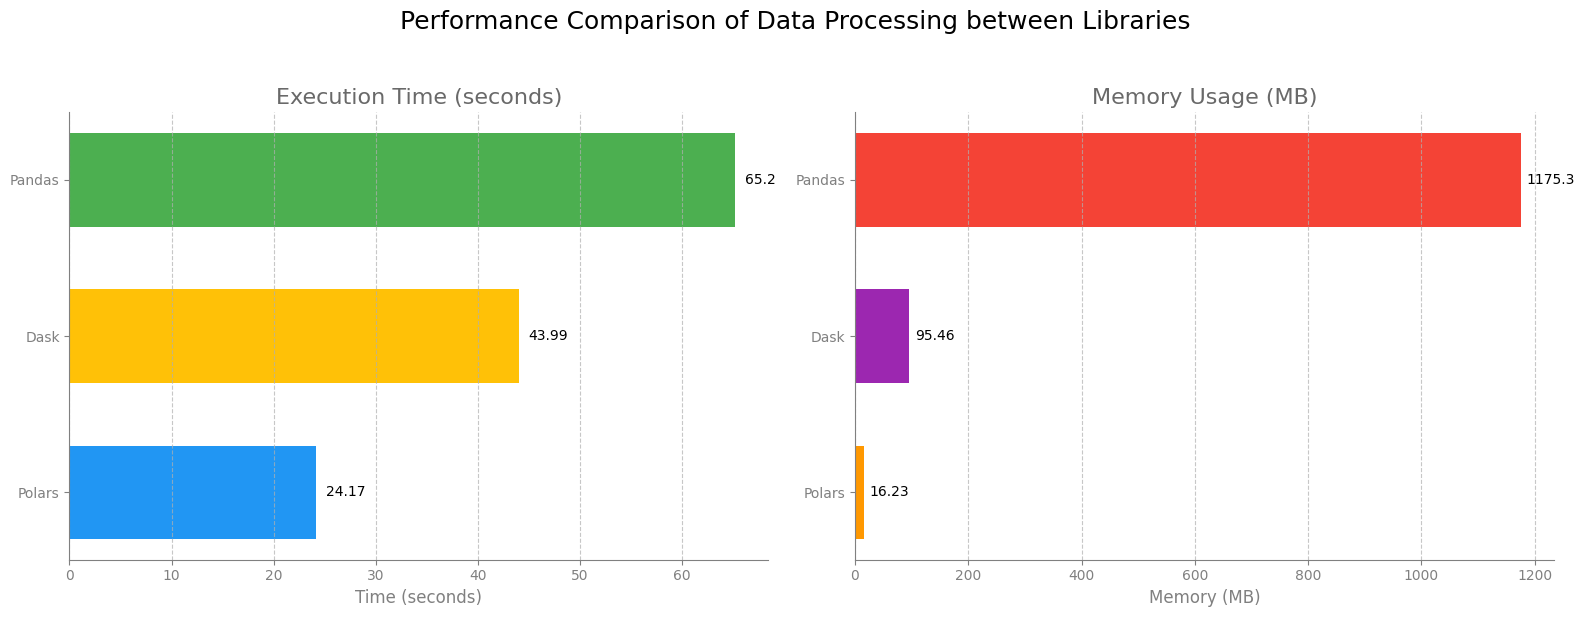

In [ ]:
import matplotlib.pyplot as plt

# Data
libraries = ['Pandas', 'Dask', 'Polars']
execution_time = [round(execution_time_pandas, 2) , round(execution_time_dask, 2), round(execution_time_polars, 2)]
memory_usage = [round(memory_used_pandas,2), round(memory_used_dask,2), round(memory_used_polars,2)]


fig, axs = plt.subplots(1, 2, figsize=(16, 6)) # Increase figure size for better readability

# Colors for the bars
colors_time = ['#4CAF50', '#FFC107', '#2196F3'] # Green, Amber, Blue
colors_memory = ['#F44336', '#9C27B0', '#FF9800'] # Red, Purple, Orange

# Execution Time
axs[0].barh(libraries, execution_time, color=colors_time, height=0.6) # Adjust bar height
axs[0].set_title('Execution Time (seconds)', fontsize=16, color='dimgray')
axs[0].invert_yaxis()
axs[0].set_xlabel('Time (seconds)', fontsize=12, color='gray')

# Add value labels to bars
for i, v in enumerate(execution_time):
    axs[0].text(v + 1, i, str(v), color='black', va='center', fontsize=10) # Position and color

# Memory Usage
axs[1].barh(libraries, memory_usage, color=colors_memory, height=0.6) # Adjust bar height
axs[1].set_title('Memory Usage (MB)', fontsize=16, color='dimgray')
axs[1].invert_yaxis()
axs[1].set_xlabel('Memory (MB)', fontsize=12, color='gray')

# Add value labels
for i, v in enumerate(memory_usage):
    axs[1].text(v + 10, i, str(v), color='black', va='center', fontsize=10) # Position and color

# Customization
for ax in axs:
    ax.tick_params(axis='x', colors='gray', labelsize=10)
    ax.tick_params(axis='y', colors='gray', labelsize=10)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_color('gray')
    ax.spines['bottom'].set_color('gray')
    ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.suptitle('Performance Comparison of Data Processing between Libraries', fontsize=18, color='black', y=1.02) # Overall title
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()